In [5]:
%load_ext autoreload
%autoreload 2

In [66]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

from yolov7.distillate import load_teacher
from yolov7.models.yolo import DistillationType
from yolov7.utils.datasets import letterbox
from vision_data_engine.utils.search import load_image
from vision_data_engine.utils.visualization import create_imgs_with_labels
from vision_data_engine.utils.general import get_class_names



In [2]:
teacher = load_teacher(
    "/media/magalhaes/vision/pretrained/yolov7x_training.pt",
    "../yolov7/cfg/training/yolov7x.yaml",
    80,
    torch.device("cuda"),
    DistillationType.HEAD,
)

Transferred 642/644 items from /media/magalhaes/vision/pretrained/yolov7x_training.pt


In [109]:
img_path = "/home/guests2/msg/coco/images/train2017/000000390002.jpg"

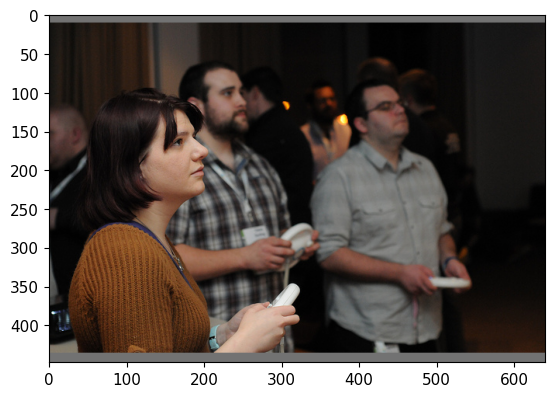

In [110]:
img = load_image(img_path)
img = letterbox(img)[0]

plt.imshow(img)
plt.show()

In [111]:

img_torch = torch.from_numpy(img).permute(2,0,1).unsqueeze(0).float().cuda() / 255.0
pred, out = teacher(img_torch, distillation=True)


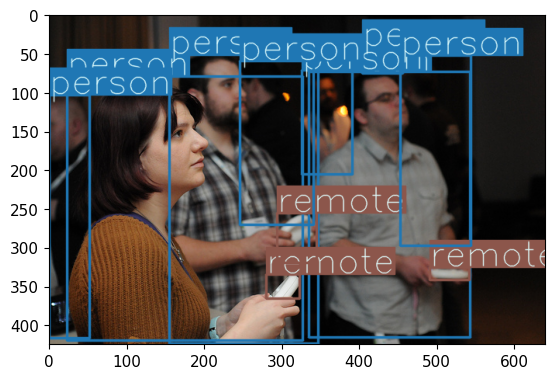

In [112]:
%matplotlib inline
img_and_labels = create_imgs_with_labels([img_path], get_class_names("data/coco.yaml"))
plt.imshow(img_and_labels[img_path.split("/")[-1]])
plt.show()

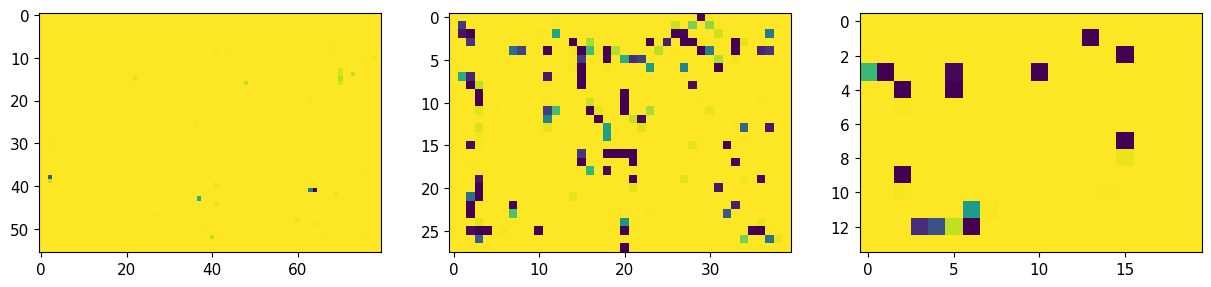

In [119]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(out[0][0].sum(0).sigmoid().cpu().numpy())
axs[1].imshow(out[1][0].sum(0).sigmoid().cpu().numpy())
axs[2].imshow(out[2][0].sum(0).sigmoid().cpu().numpy())


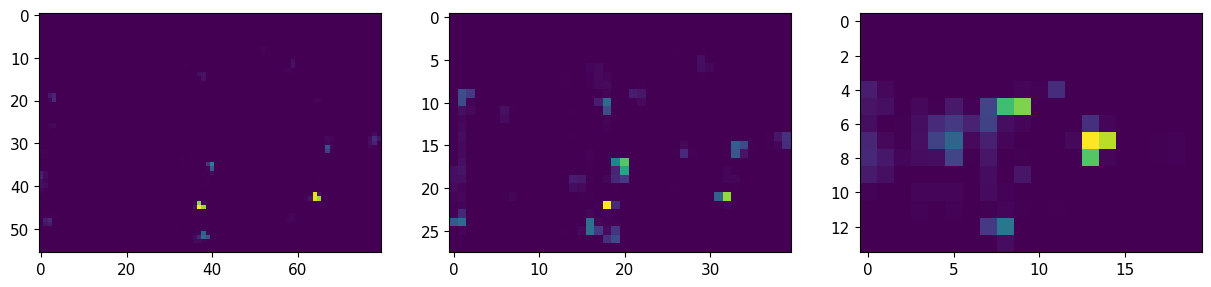

In [114]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(pred[0][0][...,4].max(dim=0).values.sigmoid().cpu().numpy())
axs[1].imshow(pred[1][0][...,4].max(dim=0).values.sigmoid().cpu().numpy())
axs[2].imshow(pred[2][0][...,4].max(dim=0).values.sigmoid().cpu().numpy())


In [115]:
def normalize(tensor, dim=0):
    tensor = (tensor - tensor.min()).sum(0)
    return tensor / tensor.max()

In [ ]:
F.normalize(pred[0][0][...,4] - pred[0][0][...,4].min(), dim=0)

In [ ]:
normalize(pred[0][0][...,4], dim=0)

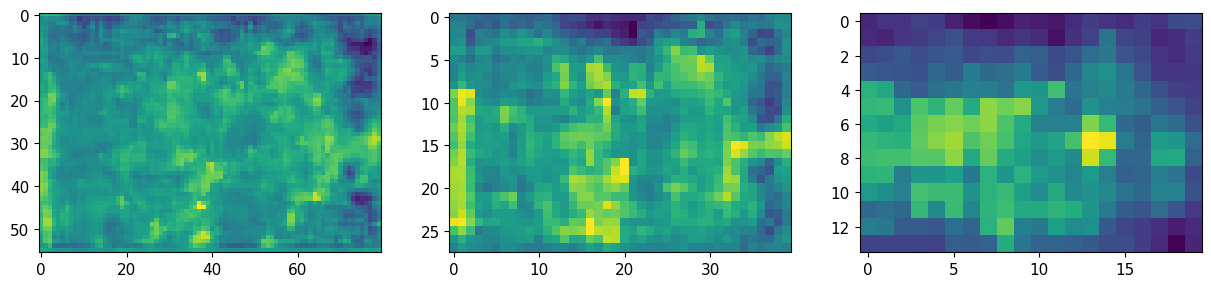

In [117]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(normalize(pred[0][0][...,4], dim=0).cpu().numpy())
axs[1].imshow(normalize(pred[1][0][...,4], dim=0).cpu().numpy())
axs[2].imshow(normalize(pred[2][0][...,4], dim=0).cpu().numpy())

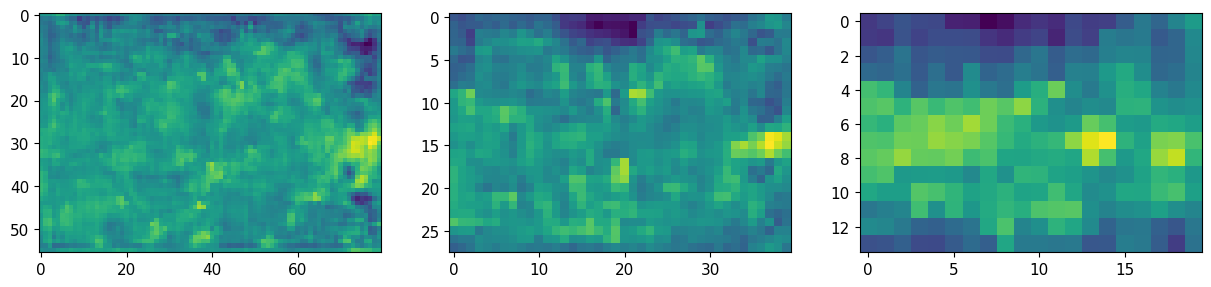

In [125]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(F.normalize(pred[0][0][...,4].sum(0) - pred[0][0][...,4].sum(0).min(), dim=0).cpu().numpy())
axs[1].imshow(F.normalize(pred[1][0][...,4].sum(0) - pred[0][0][...,4].sum(0).min(), dim=0).cpu().numpy())
axs[2].imshow(F.normalize(pred[2][0][...,4].sum(0) - pred[0][0][...,4].sum(0).min(), dim=0).cpu().numpy())